Name: Priyanshu Prakash,
College:Vit Vellore

Name: Shreyas Saxena,
College:KIIT

# We are building the project on Mnist Dataset

About Mnist data:
The MNIST database contains 60,000 training images and 10,000 testing images. 
Half of the training set and half of the test set were taken from NIST's training dataset, 
while the other half of the training set and the other half of the test set were taken from NIST's testing dataset.

Here we would we using ANN and CNN models to train and test the data sets

we are getting an test accuracy of 97.73% 

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as 

In [2]:
from torch.utils.data import DataLoader
from torchvision import datasets,transforms

In [3]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#MNIST image to tensor

In [5]:
transform=transforms.ToTensor()

In [6]:
train_data=datasets.MNIST(root='/Users/priyanshuprakash/Desktop/4th Year/Image processing/ANN',train=True,download=True,transform=transform)

In [7]:
test_data=datasets.MNIST(root='/Users/priyanshuprakash/Desktop/4th Year/Image processing/ANN',train=False,download=True,transform=transform)

In [8]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: /Users/priyanshuprakash/Desktop/4th Year/Image processing/ANN
    Split: Train
    StandardTransform
Transform: ToTensor()

In [9]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: /Users/priyanshuprakash/Desktop/4th Year/Image processing/ANN
    Split: Test
    StandardTransform
Transform: ToTensor()

In [10]:
type(train_data)

torchvision.datasets.mnist.MNIST

In [11]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [12]:
image,label=train_data[0]

In [13]:
image.shape

torch.Size([1, 28, 28])

In [14]:
label

5

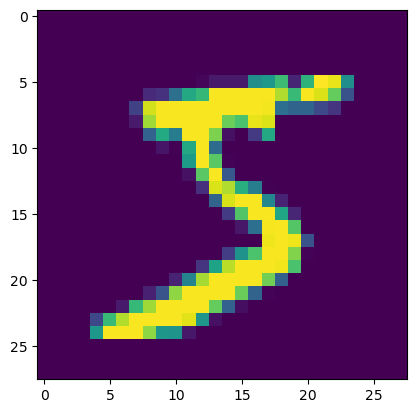

In [15]:
plt.imshow(image.reshape((28,28)))

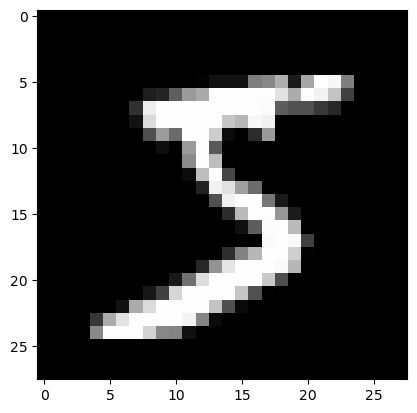

In [16]:
plt.imshow(image.reshape((28,28)),cmap='gray')

In [17]:
torch.manual_seed(101)

train_loader=DataLoader(train_data,batch_size=100,shuffle=True)
test_loader=DataLoader(test_data,batch_size=500,shuffle=False)

In [18]:
from torchvision.utils import make_grid
np.set_printoptions(formatter=dict(int=lambda x:f'{x:4}')) #FORMATTING

In [19]:
#First Batch
for images,labels in train_loader:
    break

In [20]:
images.shape  # 1->Means it is a grey scale image,(28,28)->width,length of image is 28,28.100->we have 100 images dataset

torch.Size([100, 1, 28, 28])

In [21]:
labels.shape

torch.Size([100])

Labels: [   7    2    3    5    8    5    3    6    9    9    1    3]


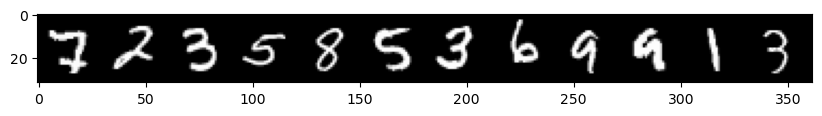

In [22]:
#Print first 12 labels
print('Labels:',labels[:12].numpy())

#Print the first 12 images
im=make_grid(images[:12],nrow=12)#default nrow is 8
plt.figure(figsize=(10,4))

plt.imshow(np.transpose(im.numpy(),(1,2,0)));

In [23]:
class MultilayerPerceptron(nn.Module):
    def __init__(self,in_sz=784,out_sz=10,layers=[120,84]):
        super().__init__()
        
        self.fc1=nn.Linear(in_sz,layers[0])
        self.fc2=nn.Linear(layers[0],layers[1])
        self.fc3=nn.Linear(layers[1],out_sz)
    
    def forward(self,x): #x->data features
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=self.fc3(x)
        
        return F.log_softmax(x,dim=1) #Multi-class classification
        
        

In [24]:
torch.manual_seed(101)
model=MultilayerPerceptron()
model

MultilayerPerceptron(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [25]:
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)

In [26]:
images.shape

torch.Size([100, 1, 28, 28])

In [27]:
images.view(100,-1)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [28]:
import time
start_time = time.time()

epochs = 10
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        b+=1
        
        # Apply the model
        y_pred = model(X_train.view(100, -1))  # Here we flatten X_train
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print interim results
        if b%200 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{100*b:6}/60000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(100*b):7.3f}%')
    
    # Update train loss & accuracy for the epoch
    train_losses.append(loss.item())
    train_correct.append(trn_corr.item())
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = model(X_test.view(500, -1))  # Here we flatten X_test

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()

    # Update test loss & accuracy for the epoch
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)
        
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed            





#total_time=time.time()-start_time
#print(f'Duration:{Total time/60}mins')






epoch:  0  batch:  200 [ 20000/60000]  loss: 0.23562382  accuracy:  83.245%
epoch:  0  batch:  400 [ 40000/60000]  loss: 0.35330707  accuracy:  87.532%
epoch:  0  batch:  600 [ 60000/60000]  loss: 0.13765770  accuracy:  89.582%
epoch:  1  batch:  200 [ 20000/60000]  loss: 0.24507998  accuracy:  94.880%
epoch:  1  batch:  400 [ 40000/60000]  loss: 0.14064841  accuracy:  95.110%
epoch:  1  batch:  600 [ 60000/60000]  loss: 0.07430533  accuracy:  95.377%
epoch:  2  batch:  200 [ 20000/60000]  loss: 0.08479684  accuracy:  96.570%
epoch:  2  batch:  400 [ 40000/60000]  loss: 0.06338982  accuracy:  96.672%
epoch:  2  batch:  600 [ 60000/60000]  loss: 0.06284785  accuracy:  96.737%
epoch:  3  batch:  200 [ 20000/60000]  loss: 0.11593810  accuracy:  97.650%
epoch:  3  batch:  400 [ 40000/60000]  loss: 0.05100821  accuracy:  97.468%
epoch:  3  batch:  600 [ 60000/60000]  loss: 0.03086828  accuracy:  97.493%
epoch:  4  batch:  200 [ 20000/60000]  loss: 0.11303577  accuracy:  98.170%
epoch:  4  b

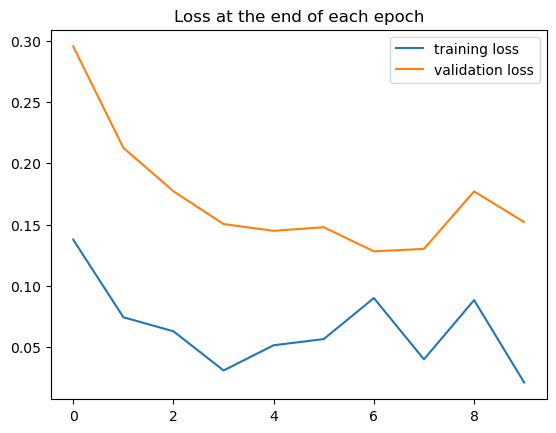

In [29]:
plt.plot(train_losses, label='training loss')
plt.plot(test_losses, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend();

Evaluating test data

In [30]:
print(test_correct) # contains the results of all 10 epochs
print()
print(f'Test accuracy: {test_correct[-1].item()*100/10000:.3f}%') # print the most recent result as a percent

[tensor(9437), tensor(9579), tensor(9691), tensor(9706), tensor(9746), tensor(9759), tensor(9777), tensor(9756), tensor(9751), tensor(9773)]

Test accuracy: 97.730%


In [31]:
# Extract the data all at once, not in batches
test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)

In [32]:
with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        y_val = model(X_test.view(len(X_test), -1))  # pass in a flattened view of X_test
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()
print(f'Test accuracy: {correct.item()}/{len(test_data)} = {correct.item()*100/(len(test_data)):7.3f}%')

Test accuracy: 9773/10000 =  97.730%


Confusion Matrix

In [33]:
# print a row of values for reference
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}'))
print(np.arange(10).reshape(1,10))
print()

# print the confusion matrix
print(confusion_matrix(predicted.view(-1), y_test.view(-1)))

[[   0    1    2    3    4    5    6    7    8    9]]

[[ 970    0    4    0    1    2    6    3    5    3]
 [   0 1124    4    0    0    0    3    7    0    2]
 [   1    3 1002    2    1    0    2   11    2    0]
 [   3    3    5  991    0   10    1    3    4    2]
 [   1    0    2    0  961    3    4    2    2    5]
 [   0    0    0    5    0  865    3    1    2    2]
 [   1    1    2    0    6    2  938    0    1    0]
 [   1    0    3    4    1    0    0  978    3    0]
 [   2    4   10    2    1    8    1    2  952    3]
 [   1    0    0    6   11    2    0   21    3  992]]


# Using CNN for "Mnist" Dataset

In [34]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
transform = transforms.ToTensor()

train_data = datasets.MNIST(root='/Users/priyanshuprakash/Desktop/4th Year/Image processing/ANN', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='/Users/priyanshuprakash/Desktop/4th Year/Image processing/ANN', train=False, download=True, transform=transform)

In [37]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: /Users/priyanshuprakash/Desktop/4th Year/Image processing/ANN
    Split: Train
    StandardTransform
Transform: ToTensor()

In [38]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: /Users/priyanshuprakash/Desktop/4th Year/Image processing/ANN
    Split: Test
    StandardTransform
Transform: ToTensor()

In [39]:
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)

In [40]:
#Defining CNN

In [41]:
conv1 = nn.Conv2d(1, 6, 3, 1)
conv2 = nn.Conv2d(6, 16, 3, 1)

In [42]:
# Grab the first MNIST record
for i, (X_train, y_train) in enumerate(train_data):
    break

In [43]:
# Create a rank-4 tensor to be passed into the model
# (train_loader will have done this already)
x = X_train.view(1,1,28,28)
print(x.shape)

torch.Size([1, 1, 28, 28])


In [44]:
# Perform the first convolution/activation
x = F.relu(conv1(x))
print(x.shape)

torch.Size([1, 6, 26, 26])


In [45]:
# Run the first pooling layer
x = F.max_pool2d(x, 2, 2)
print(x.shape)

torch.Size([1, 6, 13, 13])


In [46]:
# Perform the second convolution/activation
x = F.relu(conv2(x))
print(x.shape)

torch.Size([1, 16, 11, 11])


In [48]:
# Run the second pooling layer
x = F.max_pool2d(x, 2, 2)
print(x.shape)

torch.Size([1, 16, 5, 5])


In [49]:
# Flatten the data
x = x.view(-1, 5*5*16)
print(x.shape)

torch.Size([1, 400])


In [50]:
class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 3, 1)
        self.conv2 = nn.Conv2d(6, 16, 3, 1)
        self.fc1 = nn.Linear(5*5*16, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84,10)

    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        X = X.view(-1, 5*5*16)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return F.log_softmax(X, dim=1)

In [51]:
torch.manual_seed(42)
model = ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [52]:
#Loss function

In [53]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [54]:
#Train the model
import time
start_time = time.time()

epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        b+=1
        
        # Apply the model
        y_pred = model(X_train)  # we don't flatten X-train here
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print interim results
        if b%600 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{10*b:6}/60000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(10*b):7.3f}%')
        
    train_losses.append(loss.item())
    train_correct.append(trn_corr.item())
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = model(X_test)

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()
            
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)
        
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed     

epoch:  0  batch:  600 [  6000/60000]  loss: 0.04055630  accuracy:  78.417%
epoch:  0  batch: 1200 [ 12000/60000]  loss: 0.08253471  accuracy:  85.800%
epoch:  0  batch: 1800 [ 18000/60000]  loss: 0.36470532  accuracy:  88.689%
epoch:  0  batch: 2400 [ 24000/60000]  loss: 0.01825019  accuracy:  90.525%
epoch:  0  batch: 3000 [ 30000/60000]  loss: 0.00806712  accuracy:  91.650%
epoch:  0  batch: 3600 [ 36000/60000]  loss: 0.00097706  accuracy:  92.492%
epoch:  0  batch: 4200 [ 42000/60000]  loss: 0.44326892  accuracy:  93.133%
epoch:  0  batch: 4800 [ 48000/60000]  loss: 0.03169333  accuracy:  93.615%
epoch:  0  batch: 5400 [ 54000/60000]  loss: 0.01946524  accuracy:  94.031%
epoch:  0  batch: 6000 [ 60000/60000]  loss: 0.02709320  accuracy:  94.333%
epoch:  1  batch:  600 [  6000/60000]  loss: 0.01472266  accuracy:  97.750%
epoch:  1  batch: 1200 [ 12000/60000]  loss: 0.04359249  accuracy:  97.875%
epoch:  1  batch: 1800 [ 18000/60000]  loss: 0.00124075  accuracy:  97.900%
epoch:  1  b

In [55]:
## Plot the loss and accuracy comparisons

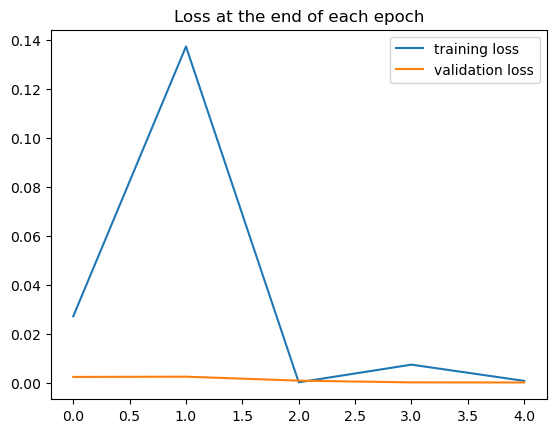

In [56]:
plt.plot(train_losses, label='training loss')
plt.plot(test_losses, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend();

In [57]:
test_losses

[tensor(0.0023),
 tensor(0.0024),
 tensor(0.0008),
 tensor(0.0001),
 tensor(6.7299e-05)]

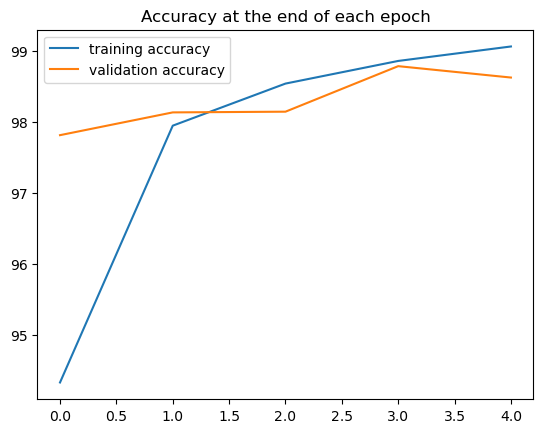

In [58]:
plt.plot([t/600 for t in train_correct], label='training accuracy')
plt.plot([t/100 for t in test_correct], label='validation accuracy')
plt.title('Accuracy at the end of each epoch')
plt.legend();

In [59]:
#Evaluate Test data
test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)
with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        y_val = model(X_test)  # we don't flatten the data this time
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()
print(f'Test accuracy: {correct.item()}/{len(test_data)} = {correct.item()*100/(len(test_data)):7.3f}%')

Test accuracy: 9862/10000 =  98.620%


In [64]:
#Confusion Matrix
# print a row of values for reference
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}'))
print(np.arange(10).reshape(1,10))
print()

# print the confusion matrix
print(confusion_matrix(predicted.view(-1), y_test.view(-1)))

[[   0    1    2    3    4    5    6    7    8    9]]

[[ 975    0    0    0    0    3    4    0    4    0]
 [   0 1134    4    1    1    0    4    5    0    3]
 [   2    0 1019    1    0    0    0    5    2    0]
 [   0    1    0 1002    0   19    0    0    1    0]
 [   0    0    1    0  978    0    2    0    1   16]
 [   0    0    0    2    0  858    0    0    0    2]
 [   1    0    0    0    2    2  947    0    0    1]
 [   1    0    6    2    0    0    0 1015    3    6]
 [   1    0    2    2    0    3    1    1  962    9]
 [   0    0    0    0    1    7    0    2    1  972]]


# Run a new image through the model

We can also pass a single image through the model to obtain a prediction.
Pick a number from 0 to 9999, assign it to "x", and we'll use that value to select a number from the MNIST test set.

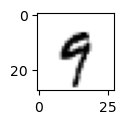

In [61]:
x = 2019
plt.figure(figsize=(1,1))
plt.imshow(test_data[x][0].reshape((28,28)), cmap="gist_yarg");

In [62]:
model.eval()
with torch.no_grad():
    new_pred = model(test_data[x][0].view(1,1,28,28)).argmax()
print("Predicted value:",new_pred.item())

Predicted value: 9
